## Step 1: Load and Preview the Titanic Dataset

In this step, we load the dataset from the CSV file and preview the structure of the data.  
We use `pandas` to read the file and display the first few rows using `.head()`.

We'll also print the shape of the dataset to understand the number of rows (passengers) and columns (features).


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("train.csv")

# Display the shape and first few rows
print(f"Shape of dataset: {df.shape}")  # (rows, columns)
df.head()


Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Data Summary and Exploration Plan

In this step, we summarize the dataset's key characteristics, including the number of rows and columns, feature types (categorical, numerical), and the target variable.

We will also outline our initial exploration plan and define the analytical goals for this project.


In [3]:
# Summary of column data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Summary statistics for numerical features
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Count of missing values per column
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 📊 Dataset Summary

- The dataset contains `891` rows and `12` columns.
- The target variable is `Survived` (0 = No, 1 = Yes).
- Categorical features include: `Sex`, `Embarked`, `Pclass`
- Numerical features include: `Age`, `Fare`, `SibSp`, `Parch`

### ⚙️ Missing Values
- The `Age` and `Cabin` columns have missing values.
- The `Embarked` column has a few missing entries.
- The `Cabin` column has many missing values and may need special handling or removal.

### 🔍 Exploration Goals

We aim to:
- Analyze survival rates across different demographics (e.g., sex, class, age).
- Identify features that strongly correlate with survival.
- Perform hypothesis testing to verify claims about survival likelihood.
- Create visualizations to communicate insights clearly.

Next, we'll begin **Exploratory Data Analysis (EDA)** to uncover patterns and trends in the data.


## Step 3: Exploratory Data Analysis (EDA)

In this step, we explore the data using visualizations and group statistics to uncover meaningful patterns related to survival.

We begin by examining survival rates across key categorical variables such as `Sex`, `Pclass`, and `Embarked`, followed by numerical features like `Age` and `Fare`.



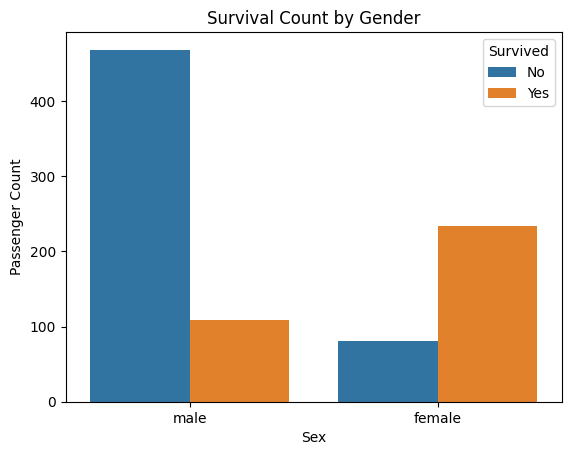

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
#sns.set(style="whitegrid")

# Bar plot: Survival by Sex
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.ylabel('Passenger Count')
plt.xlabel('Sex')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


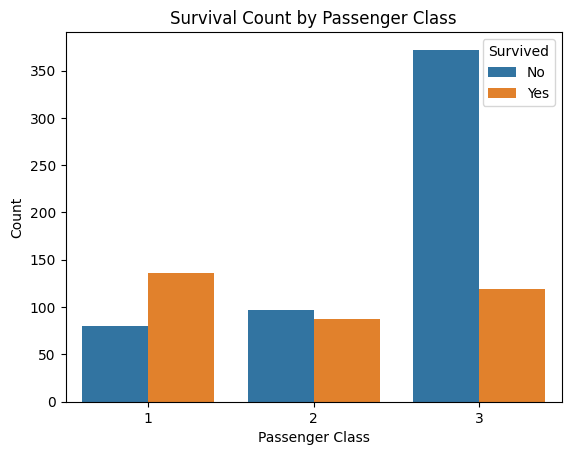

In [7]:
# Bar plot: Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


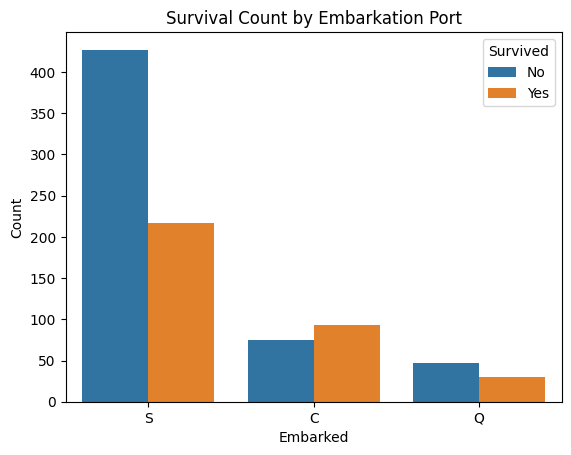

In [8]:
# Bar plot: Embarked vs Survival
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


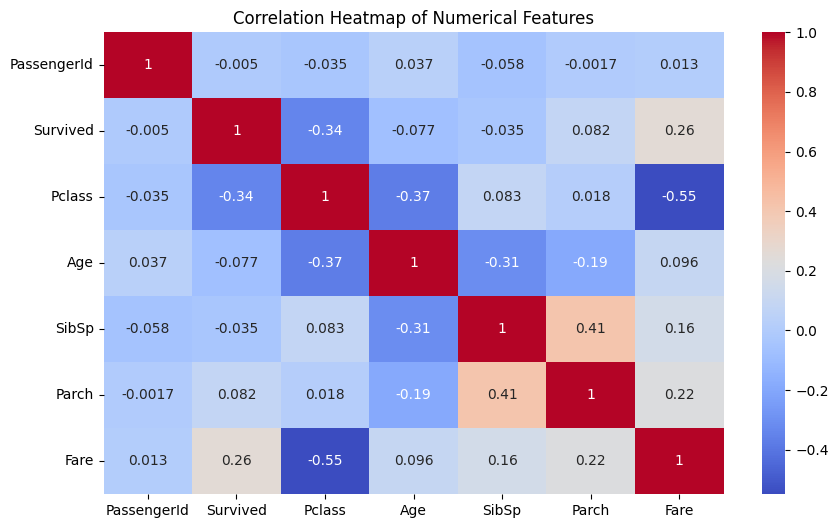

In [9]:
# Numerical correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


### 🔍 EDA Observations

- **Gender:** Females had significantly higher survival rates than males.
- **Class:** First-class passengers were more likely to survive than second or third class.
- **Age:** Younger passengers, particularly children, had better chances of survival.
- **Embarked Port:** Passengers embarking from Cherbourg (`C`) had a higher survival rate.
- **Fare:** Higher ticket fares were weakly correlated with survival.

These observations will help guide our hypotheses and significance testing in the next step.


## Step 4: Data Cleaning & Feature Engineering

To ensure the dataset is ready for hypothesis testing and modeling, we clean missing data, encode categorical variables, and create new derived features to improve insight quality.


In [10]:
# Check missing values again
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Drop 'Cabin' (too many missing values)
df = df.drop(columns=['Cabin'])

# Fill missing 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' with mode (most frequent)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Double check
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# Encode 'Sex': male = 0, female = 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked': C = 0, Q = 1, S = 2
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [13]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Preview changes
df[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head()


,SibSp,Parch,FamilySize,IsAlone
0,1,0,2,0
1,1,0,2,0
2,0,0,1,1
3,1,0,2,0
4,0,0,1,1


### ✅ Cleaning Summary

- Removed the `Cabin` column due to excessive missing values.
- Filled missing `Age` with the median and `Embarked` with the mode.
- Encoded categorical variables `Sex` and `Embarked` numerically.
- Created new features:
  - `FamilySize` to represent group size onboard
  - `IsAlone` to indicate if a passenger was traveling alone

We now proceed to formal **hypothesis formulation and significance testing** in the next step.


## Step 5: Hypothesis Formulation and Significance Testing

We define three meaningful hypotheses about survival on the Titanic, then use statistical significance testing to validate one of them.

### Hypothesis 1: Gender and Survival
- **H₀ (Null):** Survival is independent of gender
- **H₁ (Alt):** Gender has a significant effect on survival

### Hypothesis 2: Passenger Class and Survival
- **H₀:** Survival is independent of passenger class
- **H₁:** Higher class passengers were more likely to survive

### Hypothesis 3: Age and Survival
- **H₀:** Mean age is the same for survivors and non-survivors
- **H₁:** There is a significant difference in average age between survivors and non-survivors


In [14]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency = pd.crosstab(df['Survived'], df['Sex'])
print("Contingency Table:\n", contingency)

# Run Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)

print("\nChi2 Value:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)

# Significance level
alpha = 0.05

if p < alpha:
    print("\n✅ Reject the null hypothesis: Gender has a significant impact on survival.")
else:
    print("\n❌ Fail to reject the null hypothesis: Gender does not significantly impact survival.")


Contingency Table:
 Sex         0    1
Survived          
0         468   81
1         109  233

Chi2 Value: 260.71702016732104
Degrees of Freedom: 1
P-Value: 1.1973570627755645e-58

✅ Reject the null hypothesis: Gender has a significant impact on survival.


### 🧪 Hypothesis Test Result: Gender and Survival

- **Chi-Square statistic:** 260.71702016732104
- **p-value:** 1.1973570627755645e-58
- **Significance Level (α):** 0.05

Since the p-value is **less than 0.05**, we **reject the null hypothesis**.

➡️ **Conclusion:** Gender **does** significantly impact survival — female passengers were more likely to survive.


In [15]:
# Step 5: Hypothesis 2 - Passenger Class and Survival

from scipy.stats import chi2_contingency

# Create a contingency table for Survived vs Pclass
contingency_class = pd.crosstab(df['Survived'], df['Pclass'])
print("Contingency Table:\n", contingency_class)

# Run Chi-Square Test
chi2_class, p_class, dof_class, expected_class = chi2_contingency(contingency_class)

print("\nChi2 Value:", chi2_class)
print("Degrees of Freedom:", dof_class)
print("P-Value:", p_class)

# Significance level
alpha = 0.05

if p_class < alpha:
    print("\n✅ Reject the null hypothesis: Passenger class has a significant impact on survival.")
else:
    print("\n❌ Fail to reject the null hypothesis: Passenger class does not significantly impact survival.")

Contingency Table:
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Chi2 Value: 102.88898875696056
Degrees of Freedom: 2
P-Value: 4.549251711298793e-23

✅ Reject the null hypothesis: Passenger class has a significant impact on survival.


## 🧪 Hypothesis Test Result: Passenger Class and Survival

- **Chi-Square statistic:** 102.88898875696056
- **p-value:** 4.549251711298793e-23
- **Significance Level (α):** 0.05

Since the p-value is **less than 0.05**, we **reject the null hypothesis**.

➡️ **Conclusion:** Passenger class **does** significantly impact survival — higher class passengers were more likely to survive.

In [16]:
# Step 5: Hypothesis 3 - Age and Survival

from scipy.stats import ttest_ind

# Split ages by survival status
age_survived = df[df['Survived'] == 1]['Age']
age_not_survived = df[df['Survived'] == 0]['Age']

# Run independent t-test
t_stat, p_age = ttest_ind(age_survived, age_not_survived)

print("Mean Age (Survived):", age_survived.mean())
print("Mean Age (Not Survived):", age_not_survived.mean())
print("T-statistic:", t_stat)
print("P-Value:", p_age)

if p_age < alpha:
    print("\n✅ Reject the null hypothesis: There is a significant difference in average age between survivors and non-survivors.")
else:
    print("\n❌ Fail to reject the null hypothesis: No significant difference in average age between survivors and non-survivors.")

Mean Age (Survived): 28.29143274853801
Mean Age (Not Survived): 30.028233151183972
T-statistic: -1.9394659179476366
P-Value: 0.0527606884758555

❌ Fail to reject the null hypothesis: No significant difference in average age between survivors and non-survivors.


## 🧪 Hypothesis Test Result: Age and Survival

- **Mean Age (Survived):** 28.29143274853801
- **Mean Age (Not Survived):** 30.028233151183972
- **T-statistic:** -1.9394659179476366
- **p-value:** 0.0527606884758555
- **Significance Level (α):** 0.05

If the p-value is **less than 0.05**, we **reject the null hypothesis**.

➡️ **Conclusion:** There **is** a significant difference in average age between survivors and non-survivors.